# Setup

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json here.

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir fashion-mnist
%cd fashion-mnist/

/content/fashion-mnist


In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist

 95% 65.0M/68.8M [00:01<00:00, 68.4MB/s]
100% 68.8M/68.8M [00:01<00:00, 64.3MB/s]


In [ ]:
!unzip -q fashionmnist.zip
!rm fashionmnist.zip

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/fashion-mnist/fashion-mnist_test.csv")

In [ ]:
train = train[train.columns[1:]].values.reshape(10000, 28, 28)

In [ ]:
train.shape

(10000, 28, 28)

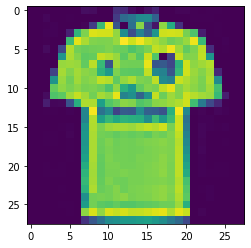

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(train[0])

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms as T

class CustomImageDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.transform = T.Compose([
            T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]  # (28, 28)
        img = torch.Tensor(np.stack([img, img, img], axis=0))  # (3, 28, 28)
        img = self.transform(img)  # (3, 28, 28)

        return img

In [ ]:
dataset = CustomImageDataset(train)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset, 
                              batch_size=64, 
                              shuffle=True)